# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: Kuznetsova Aleksandra</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import scipy.io
%matplotlib inline

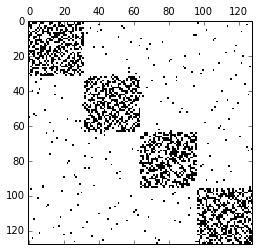

In [3]:
data = scipy.io.loadmat('network1.mat')
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

In [60]:
# the implemented algorithm
def MCL(A, tol, p, alpha):
    step = 1
    col_sums = A.sum(axis = 0)
    T = A / col_sums[np.newaxis, :]
    M = T
    while(1):
        print ('step', step)
        step += 1
        # Expancion step:
        M1 = np.linalg.matrix_power(M, p)
        # Inflation step:
        M1 = np.power(M1, alpha)
        row_sums = M1.sum(axis = 1)
        M1 = M1 / row_sums[np.newaxis, :]
        M1[M1<=tol] = 0
        if np.linalg.norm(M - M1) == 0:
            return M1
        else:
            M = M1.copy()

In [64]:
# algorithm for the first network 
MCL(A, 0.1,2,2)

step 1
step 2
step 3


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [77]:
# algorithm for the second network 
data = scipy.io.loadmat('network2.mat')
A = data['A'].astype('float')
MCL(A, 0.03, 2, 2)

step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [88]:
# algorithm for the third network 
data = scipy.io.loadmat('network3.mat')
A = data['A'].astype('float')
MCL(A, 0.01, 2, 2)

step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [89]:
data = scipy.io.loadmat('music_data.mat')

In [111]:
names = data['artists']
A = data['A']
import re
names = [re.sub("\s\s+", '', st) for st in data['artists']]

strind = scipy.sparse.find(A)[0]
colind = scipy.sparse.find(A)[1]

G = nx.Graph()
G.add_nodes_from(names)

for i in range(0, len(strind)):
    G.add_edge(names[strind[i]],names[colind[i]])

In [113]:
nx.degree(G)

{'Seals & Crofts': 44,
 "Maura O'Connell": 53,
 'Pachora': 21,
 'Eric Dolphy': 30,
 'Shirley Temple': 25,
 'Johnny Marr + The Healers': 33,
 'Glasseater': 42,
 'Ricky Dillard': 35,
 'The Fifth Dimension': 26,
 'Hal Ketchum': 23,
 'Sons Of The Desert': 23,
 'Yaz': 64,
 'Sonny Rollins': 43,
 'Styles': 42,
 'The Moon Seven Times': 20,
 'N-Trance': 24,
 'Original Recording': 20,
 'Waterdeep': 20,
 'Pax 217': 46,
 'Outcast': 20,
 'T.S.O.L': 36,
 'Ozric Tentacles': 21,
 'Thug Life': 27,
 'Dan Fogelberg': 41,
 'Tommy Shaw': 20,
 'Mint Condition': 90,
 'Nelson (Pop)': 21,
 'Martha Reeves & The Vandellas': 35,
 'LeAnn Rimes': 41,
 'George Michael': 50,
 'Shivaree': 22,
 'Wilco': 28,
 'The Blue Nile': 25,
 'Ali Hassan Kuban': 32,
 'Marc Almond': 25,
 'Richard Jeni': 20,
 'Smilez & Southstar': 35,
 'Lloyd Price': 34,
 'Gilberto Santa Rosa': 54,
 'Virgin Prunes': 31,
 'John Mayer [Jazz]': 19,
 '1NC (One Nation Crew)': 21,
 'Brainstorm': 21,
 'Marshall Crenshaw': 35,
 'Bob Marley': 26,
 'Vagabond L